## Transcriptions `Analyzer`

In [9]:
# %pip install matplotlib
# %pip install sqlite3
#%pip install plotly
#%pip install pandas
#%pip install nbformat


  Using cached nbformat-5.9.2-py3-none-any.whl (77 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0
Note: you may need to restart the kernel to use updated packages.


In [10]:
import sqlite3
import matplotlib.pyplot as plt

In [11]:
# Connect to the database
conn = sqlite3.connect('transcriptions.db')
cursor = conn.cursor()

In [12]:
# Query the database 
cursor.execute('SELECT issue_category FROM transcriptions')
results = cursor.fetchall()

In [13]:
# Process the data
category_counts = {}
for result in results:
    category = result[0]
    category_counts[category] = category_counts.get(category, 0) + 1

In [14]:
# Draw the pie chart
labels = category_counts.keys()
sizes = category_counts.values()

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning:

savefig() 

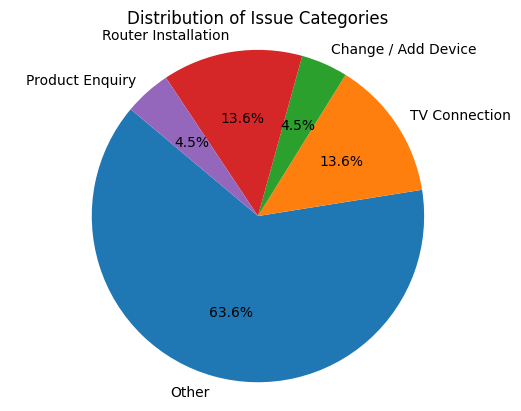

In [15]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Issue Categories')
plt.show()

### We can also use <span style="color:turquoise;">PLOTLY</span> to visualize the data


In [19]:
# Create a pie chart using Plotly
import plotly.express as px
import pandas

labels = list(category_counts.keys())
values = list(category_counts.values())
fig = px.pie(labels=labels, values=values, title='Distribution of Issue Categories')
#fig.update_layout(renderer="notebook")
fig.write_html('plotly_chart.html')
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Close the database connection
conn.close()